# Data set

https://archive.ics.uci.edu/ml/machine-learning-databases/00602/

Import the libraries:

In [140]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [141]:
#import the dataset:
df = pd.read_csv('C:\\Users\\Shahwaiz Tahir\\Desktop\\Python Analysis\\Dry_Bean_Dataset_1.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


Keys of the dataset:

In [6]:
print(df.keys())

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


No. of Rows & Columns respectively:

In [7]:
print(df.shape)

(13611, 17)


In [142]:
#Check either the data is null or not:
mv=df.isnull()

In [143]:
for column in mv.columns.values.tolist():
    print(column)
    print(mv[column].value_counts())
    print("")

Area
False    13611
Name: Area, dtype: int64

Perimeter
False    13611
Name: Perimeter, dtype: int64

MajorAxisLength
False    13611
Name: MajorAxisLength, dtype: int64

MinorAxisLength
False    13611
Name: MinorAxisLength, dtype: int64

AspectRation
False    13611
Name: AspectRation, dtype: int64

Eccentricity
False    13611
Name: Eccentricity, dtype: int64

ConvexArea
False    13611
Name: ConvexArea, dtype: int64

EquivDiameter
False    13611
Name: EquivDiameter, dtype: int64

Extent
False    13611
Name: Extent, dtype: int64

Solidity
False    13611
Name: Solidity, dtype: int64

roundness
False    13611
Name: roundness, dtype: int64

Compactness
False    13611
Name: Compactness, dtype: int64

ShapeFactor1
False    13611
Name: ShapeFactor1, dtype: int64

ShapeFactor2
False    13611
Name: ShapeFactor2, dtype: int64

ShapeFactor3
False    13611
Name: ShapeFactor3, dtype: int64

ShapeFactor4
False    13611
Name: ShapeFactor4, dtype: int64

Class
False    13611
Name: Class, dtype: int64



In [144]:
#statistic of the dataset:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [145]:
#Train dataset:
X = df.loc[:,'Area':'ShapeFactor4'].values
X

array([[2.83950000e+04, 6.10291000e+02, 2.08178117e+02, ...,
        3.14728900e-03, 8.34222388e-01, 9.98723889e-01],
       [2.87340000e+04, 6.38018000e+02, 2.00524796e+02, ...,
        3.56362400e-03, 9.09850506e-01, 9.98430331e-01],
       [2.93800000e+04, 6.24110000e+02, 2.12826130e+02, ...,
        3.04773300e-03, 8.25870617e-01, 9.99066137e-01],
       ...,
       [4.21390000e+04, 7.59321000e+02, 2.81539928e+02, ...,
        1.88827100e-03, 6.76884164e-01, 9.96767264e-01],
       [4.21470000e+04, 7.63779000e+02, 2.83382636e+02, ...,
        1.85202500e-03, 6.68236684e-01, 9.95222420e-01],
       [4.21590000e+04, 7.72237000e+02, 2.95142741e+02, ...,
        1.63981200e-03, 6.16220592e-01, 9.98179623e-01]])

In [146]:
#Conversion of categorical data into numeric:
df['Code']=pd.factorize(df.Class)[0]
df['Code'].value_counts()

6    3546
5    2636
0    2027
4    1928
3    1630
1    1322
2     522
Name: Code, dtype: int64

In [147]:
#Target value of the dataset:
y = df.iloc[:,-1]

In [148]:
#data types of each attribute:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
Code                 int64
dtype: object

In [149]:
#standalizing the data:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.84074853, -1.1433189 , -1.30659814, ...,  2.4021726 ,
         1.92572347,  0.83837102],
       [-0.82918764, -1.01392388, -1.39591111, ...,  3.10089364,
         2.68970162,  0.77113831],
       [-0.80715717, -1.07882906, -1.25235661, ...,  2.23509111,
         1.84135576,  0.91675506],
       ...,
       [-0.37203825, -0.44783294, -0.45047814, ...,  0.28920501,
         0.33632829,  0.39025106],
       [-0.37176543, -0.42702856, -0.42897404, ...,  0.22837456,
         0.2489734 ,  0.03644007],
       [-0.37135619, -0.38755718, -0.2917356 , ..., -0.12777538,
        -0.27648141,  0.71371941]])

In [150]:
#import the library to split the data into teest and train set:
from sklearn.model_selection import train_test_split

#Splitting the dataset into training and testing:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=0)
print(f"Actual_Values: {X_train.shape}{y_train.shape}")
print(f'Predicted_Values: {X_test.shape}{y_test.shape}')

Actual_Values: (10888, 16)(10888,)
Predicted_Values: (2723, 16)(2723,)


# K-Nearest Neighbors

In [152]:
#method to predict the predicted value and to check the accuracy of the predicted value:
K = 12
acc = np.zeros((K-1))
#yhat = np.zeros((K-1))
for n in range(1,K):
    neigh = KNeighborsClassifier(n_neighbors=K).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc[n-1]= metrics.accuracy_score(y_test,yhat)
               
print(f'Predicted Values: {yhat}')
print(f'Accuracy: {acc}')
print("")

Predicted Values: [6 6 6 ... 0 1 6]
Accuracy: [0.92765332 0.92765332 0.92765332 0.92765332 0.92765332 0.92765332
 0.92765332 0.92765332 0.92765332 0.92765332 0.92765332]



In [153]:
#accuracy
aCC = acc.max()

#accuracy with the value of K:
print( "The best accuracy was with", acc.max(), "with k=", acc.argmax()+1)

The best accuracy was with 0.927653323540213 with k= 1


K-Fold Cross Validation:

In [156]:
#import the library for cross validation:
from sklearn.model_selection import cross_val_score

knn=KNeighborsClassifier(n_neighbors=10)
score = cross_val_score(knn, X_train,y_train,cv=10)
score

array([0.92470156, 0.92745638, 0.91000918, 0.91919192, 0.93112948,
       0.9302112 , 0.91827365, 0.92561983, 0.921875  , 0.92095588])

In [239]:
#mean the validation score:
mean1=np.mean(score)
R1 = round(mean1,4)
R1

0.9229

In [180]:
#accuracy in percentage:
aCC_1="Accuracy = {}%".format((sum(y_test==yhat)/y_test.shape[0])*100)
aCC_1

'Accuracy = 92.7653323540213%'

In [182]:
#round off the value
r1 = round(92.7653323540213,2)
print(r1,'%')

92.77 %




# SVM

In [160]:
#import the library:
from sklearn.svm import SVC

In [161]:
#intializing the svm
classifier = SVC()  

#fit the data into the model
classifier.fit(X_train, y_train) 

SVC()

In [162]:
#predicted value
y_pred= classifier.predict(X_test)
y_pred

array([6, 6, 6, ..., 0, 1, 6], dtype=int64)

In [163]:
#Check the accuracy of the predicted value
sv_acc = metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:{}'.format(sv_acc))

Accuracy Score:0.9349981637899376


K-Fold Cross Validation:

In [164]:
#import the library for cross validation:
from sklearn.model_selection import cross_val_score

s_v_m=SVC()
score_1 = cross_val_score(s_v_m, X_train,y_train,cv=10)
score_1

array([0.92653811, 0.92470156, 0.92011019, 0.92470156, 0.93296602,
       0.93847567, 0.9164371 , 0.93572084, 0.92738971, 0.92738971])

In [238]:
#mean of validation score 
mean2 = np.mean(score_1)
R2 = round(mean2,4)
R2

0.9274

In [176]:
#accuracy in percentage:
aCC_2="Accuracy = {}%".format((sum(y_test==y_pred)/y_test.shape[0])*100)
print(aCC_2)

Accuracy = 93.49981637899376%


In [184]:
#round off the value
r2 = round(93.49981637899376,2)
print(r2,'%')

93.5 %


# Naive Bayes

In [167]:
#import the library
from sklearn.naive_bayes import GaussianNB

In [168]:
#initializing the NB
gnb = GaussianNB()
gnb

GaussianNB()

In [169]:
#fit the data into the model
gnb.fit(X_train,y_train)

GaussianNB()

In [170]:
#predict the value
pre_gnb = gnb.predict(X_test)
pre_gnb

array([6, 6, 6, ..., 0, 1, 6], dtype=int64)

In [171]:
#Check the accuracy of the predicted value
acc_gnb=metrics.accuracy_score(y_test,pre_gnb)
acc_gnb

0.8968049944913699

In [178]:
#accuracy in percentage
aCC_3="Accuracy = {}%".format((sum(y_test==pre_gnb)/y_test.shape[0])*100)
aCC_3

'Accuracy = 89.68049944913699%'

In [185]:
#round off the value
r3 = round(89.68049944913699,2)
print(r3,'%')

89.68 %


K-Fold Cross Validation

In [172]:
#import the library for cross validation
from sklearn.model_selection import cross_val_score

NB=GaussianNB()
score_2 = cross_val_score(NB, X_train,y_train,cv=10)
score_2

array([0.90358127, 0.8953168 , 0.89072544, 0.88613407, 0.91000918,
       0.8989899 , 0.89164371, 0.90541781, 0.89338235, 0.90257353])

In [235]:
#mean of validation score
mean3 = np.mean(score_2)
R3 = round(mean3,4)
R3

0.8978

In [227]:
#accuracy value of all three algorithm
Acc = [r1,r2,r3]
Acc

[92.77, 93.5, 89.68]

# Visualization of Between the all three models:

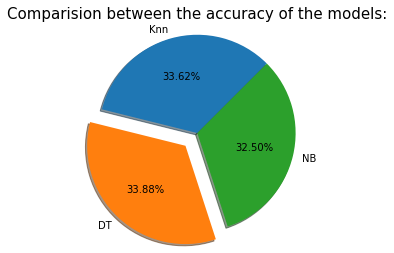

<Figure size 144x144 with 0 Axes>

In [249]:
myexplode = [0,0.2,0]
clas=['Knn','DT','NB']
plt.pie(Acc,labels=clas,radius=1.13,explode=myexplode,autopct='%.2f%%', shadow=True,startangle=45)
plt.title('Comparision between the accuracy of the models:',size=15)
plt.figure(figsize=(2,2))
plt.show()

In [241]:
from prettytable import PrettyTable

In [242]:
Column = ['Model','Accuracy','Validation']
Table = PrettyTable()

In [243]:
Table.add_column(Column[0],['KNN','SVM','Naive_Bayes'])
Table.add_column(Column[1],[r1,r2,r3])
Table.add_column(Column[2],[R1,R2,R3])
Table

Model,Accuracy,Validation
KNN,92.77,0.9229
SVM,93.5,0.9274
Naive_Bayes,89.68,0.8978


# Conclusion

In [250]:
'''
The target varible is multi class. All the model are best fit for the data set approximately. The higher accuracy and validation
of the model is SVM. SVM is best for the data set in all models. KNN is less accurate than SVM but it can not be assume in a 
worst model, it is also good for the data set. Naive bayes has low accuracy around all models. 

'''

'\nThe target varible is multi class. All the model are best fit for the data set approximately. The higher accuracy and validation\nof the model is SVM. SVM is best for the data set in all models. KNN is less accurate than SVM but it can not be assume in a \nworst model, it is also good for the data set. Naive bayes has low accuracy around all models. \n\n'